In [ ]:
from NUFFT import nufft
from util import imshow_3d
from IO import cfl
import numpy as np

In [5]:
import numpy as np
import SimpleITK as sitk
import IO.cfl

# SimpleITK demo
- Load data
- mask
- N4 

In [7]:
img = cfl.readcfl('./phantom_img')
img_i = sitk.GetImageFromArray(np.abs(img))
img_i = sitk.NormalizeImageFilter(img_i)


TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
# preprocessing
img_if = sitk.SmoothingRecursiveGaussianImageFilter

In [ ]:
import time

t0 = time.time()
img1 = NFT.Toeplitz(img)
print('Toeplitz time:',time.time()-t0)

In [8]:
imshow_3d.imshow3d(np.abs(img1[:,:,12]))

NameError: name 'imshow_3d' is not defined

In [1]:
import numpy as np
from numba import jit
import time
import NUFFT.nufft as nufft
import util.process_3d as p3
import IO.cfl as cfl
from util import imshow_3d
import IO.h5reader as h5r

No cuda module


In [20]:
h5r.uwute_read('./T12', nTE=1, return_flag = True)

UWUTE Loading data ...
(1, 1, 80194, 513) (1, 80194, 513, 3) (1, 1, 80194, 513)
Writing data ...
Done!


In [4]:
data = np.load('./T12_data.npy')
dcf = np.load('./T12_dcf.npy')
traj = np.load('./T12_traj.npy')


In [13]:
datac = data*(np.exp(1j*np.arange(513)*880*4*1e-6*2*np.pi)[None,:,None,None,None])

In [7]:
NFT = nufft.NUFFT3D(np.real(traj),pattern = dcf,seg = 10000000,Toeplitz_flag = False)


Est. Matrix size: [[-99  99]
 [-99  99]
 [-99  99]]
tansfer to single precise type ...
Total Griding time: 111.69590902328491
FFT time: 0.2965409755706787


In [14]:
img1 = NFT.adjoint(datac)

tansfer to single precise type ...
Total Griding time: 110.05187678337097
FFT time: 0.317518949508667


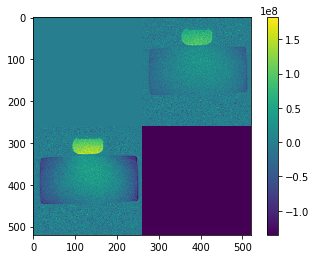

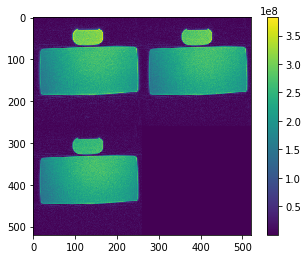

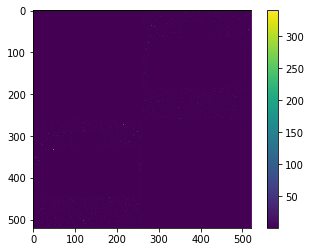

In [55]:
imshow_3d.imshow3d(np.angle(img[:,:,128,:]/img[:,:,128,:,0:1])*np.abs(img[:,:,128,:]))
imshow_3d.imshow3d(np.abs(img[:,:,128,:]))

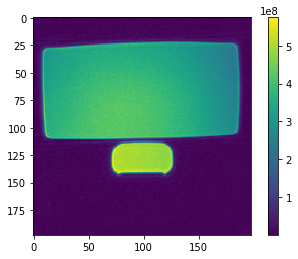

In [21]:
imshow_3d.imshow3d(np.abs(img1[:,:,96]))

In [39]:
img.shape

(260, 260, 260, 1, 3)